Plots can be deceptive.

# Initial extraction, aggregation

In [4]:
library(ggplot2)

# Load the data
chickens <- read.csv("chickens.csv")

# Display the first few instances of the dataset
head(chickens)

# Calculate some weight, eggs, and age statistics according to diet
aggregate(chickens$weight, by=list(Diet=chickens$diet), summary)
aggregate(chickens$eggs, by=list(Diet=chickens$diet), summary)
aggregate(chickens$age, by=list(Diet=chickens$diet), summary)

,weight,eggs,age,diet,wk
,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,2.600000,0.000000,0.5084757,A,1
2,2.803427,2.507034,0.5729461,A,1
3,2.806266,2.528363,0.6381378,A,1
4,2.821385,2.658041,0.6787909,A,1
5,2.844165,2.658121,0.7080204,A,1
6,2.854990,2.661139,0.7822593,A,1


Diet,x
<chr>,"<dbl[,6]>"
A,"2.6, 3.276128, 3.771662, 3.799589, 4.342516, 5.823751"
B,"2.6, 3.123751, 3.559684, 3.580205, 4.077164, 5.199313"
C,"2.6, 3.085652, 3.486712, 3.529554, 3.952332, 4.917616"


Diet,x
<chr>,"<dbl[,6]>"
A,"0, 3.438662, 4.258990, 4.278067, 5.240090, 6"
B,"0, 1.591892, 2.797533, 2.810423, 4.136105, 6"
C,"0, 2.443870, 3.240262, 3.281423, 4.255641, 6"


Diet,x
<chr>,"<dbl[,6]>"
A,"0.5084757, 1.042339, 1.483718, 1.472624, 1.843465, 2.437299"
B,"2.0094125, 2.478601, 2.840563, 2.903601, 3.371812, 3.949596"
C,"1.5185614, 2.068469, 2.498449, 2.539413, 3.032200, 3.484493"


# Visualizing

With a histogram. The ages roughly seem to be evenly distributed:

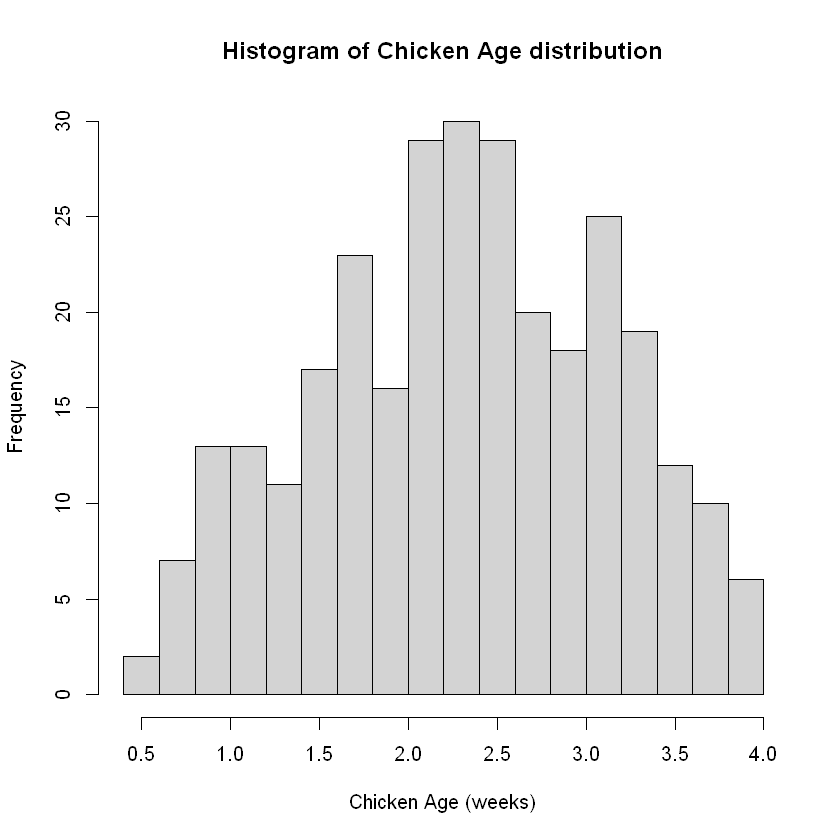

In [3]:
hist(chickens$age, breaks=15,
     main="Histogram of Chicken Age distribution", xlab="Chicken Age (weeks)")

With a boxplot

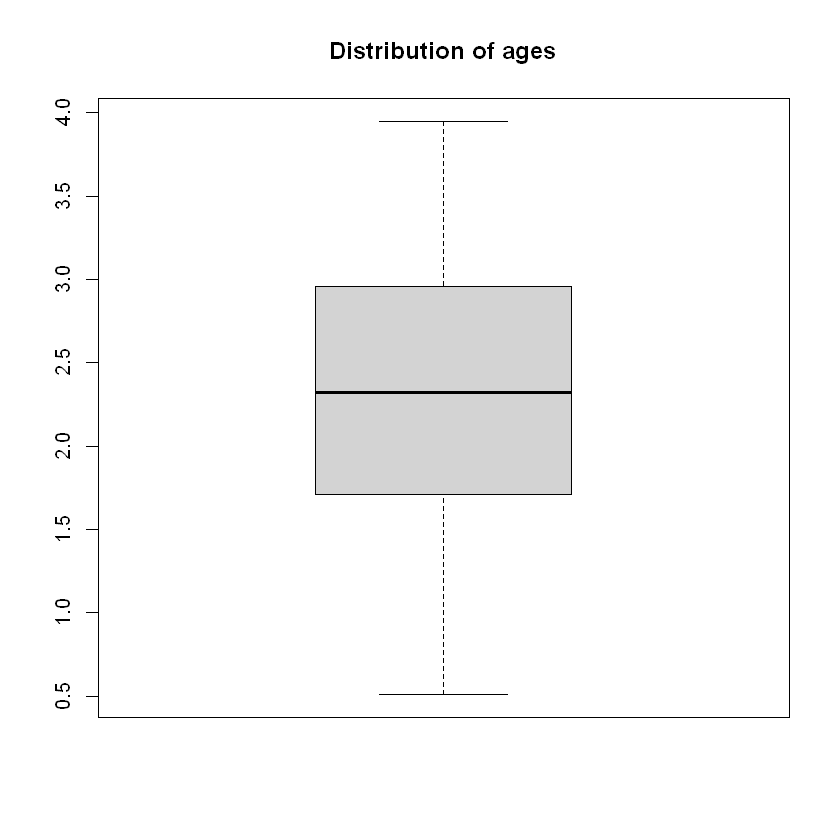

In [5]:
boxplot(chickens[,"age"], main="Distribution of ages")

Let's try different aggregations:

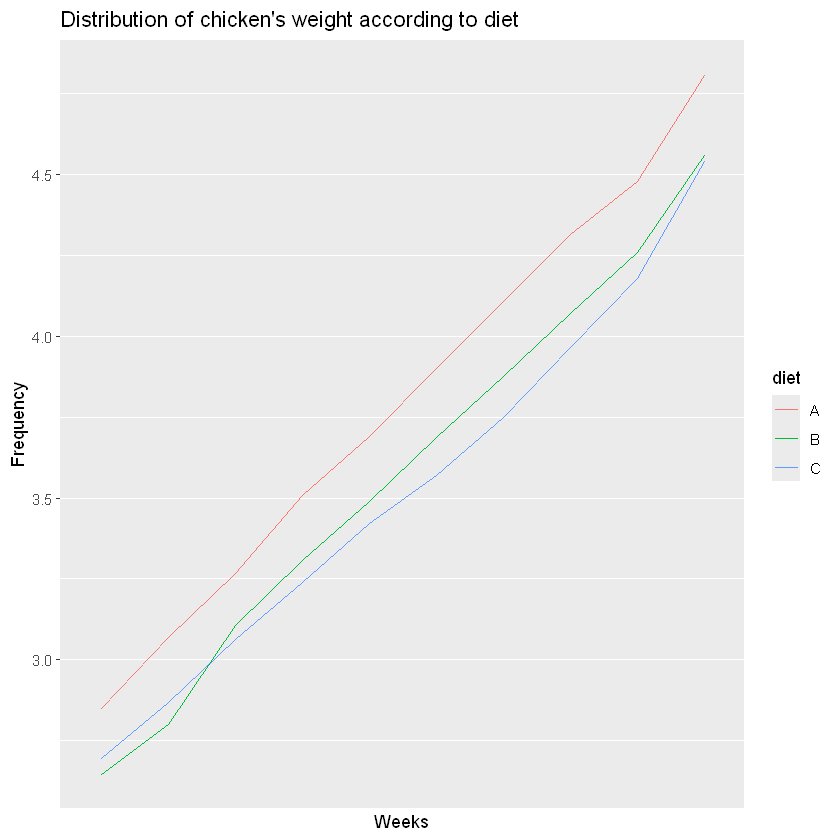

In [6]:
# A. Average weight per diet. Maybe diet A could be having a positive effect...

agg_weights = aggregate(chickens$weight,
                        by=list(chickens$wk, chickens$diet), mean)

colnames(agg_weights) = c("wk", "diet", "avg_weight")

ggplot(data=agg_weights) +
  geom_line(aes(x=wk, y=avg_weight, color=diet)) + 
  ggtitle("Distribution of chicken's weight according to diet") +
  ylab("Frequency") +
  scale_x_discrete(labels=seq(1, 12), name="Weeks")

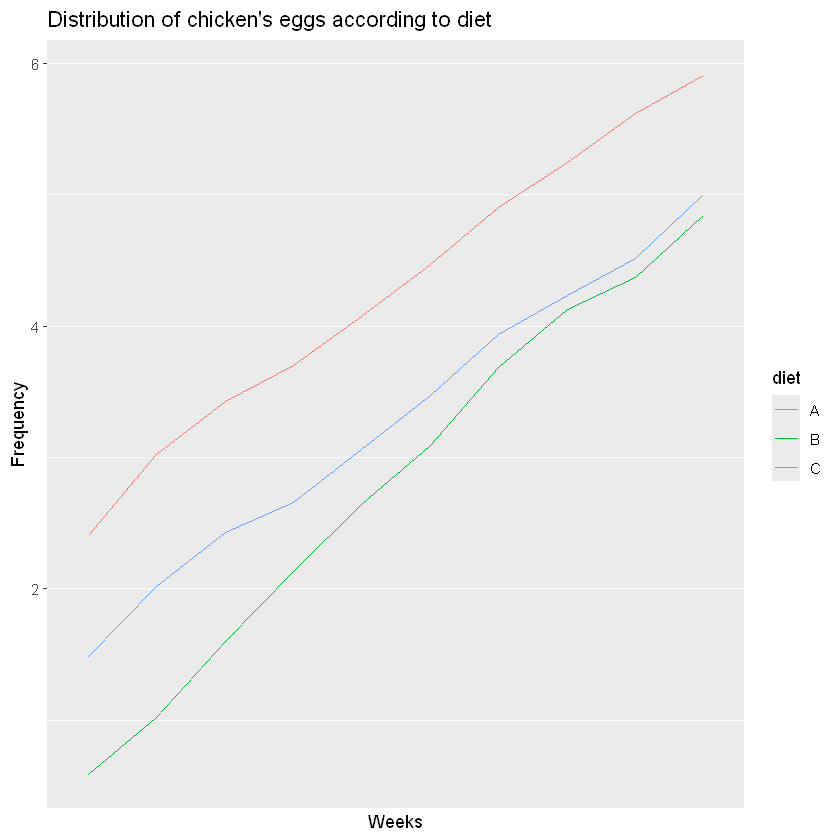

In [7]:
# B. Number of eggs per diet.
# Diet A produces at least at least an egg more per week on average.

# Could be a little too good to be true, though...

agg_eggs <- aggregate(chickens$eggs, by=list(chickens$wk, chickens$diet), mean)
colnames(agg_eggs) <- c("wk", "diet", "avg_eggs")

ggplot(data=agg_eggs) +
  geom_line(aes(x=wk, y=avg_eggs, color=diet)) +
  ggtitle("Distribution of chicken's eggs according to diet") +
  ylab("Frequency") +
  scale_x_discrete(labels=seq(1, 12), name="Weeks")

In [9]:
# C. Ages per diet

agg_age <- aggregate(chickens$age, by=list(Diet=chickens$diet), mean)
agg_age

Diet,x
<chr>,<dbl>
A,1.472624
B,2.903601
C,2.539413


Mean age of group A and group B are significantly different!

Now a scatterplot with eggs, age and diet. As chickens get older, eggs decrease.
The bulk of diet A is also composed of younger chickens.

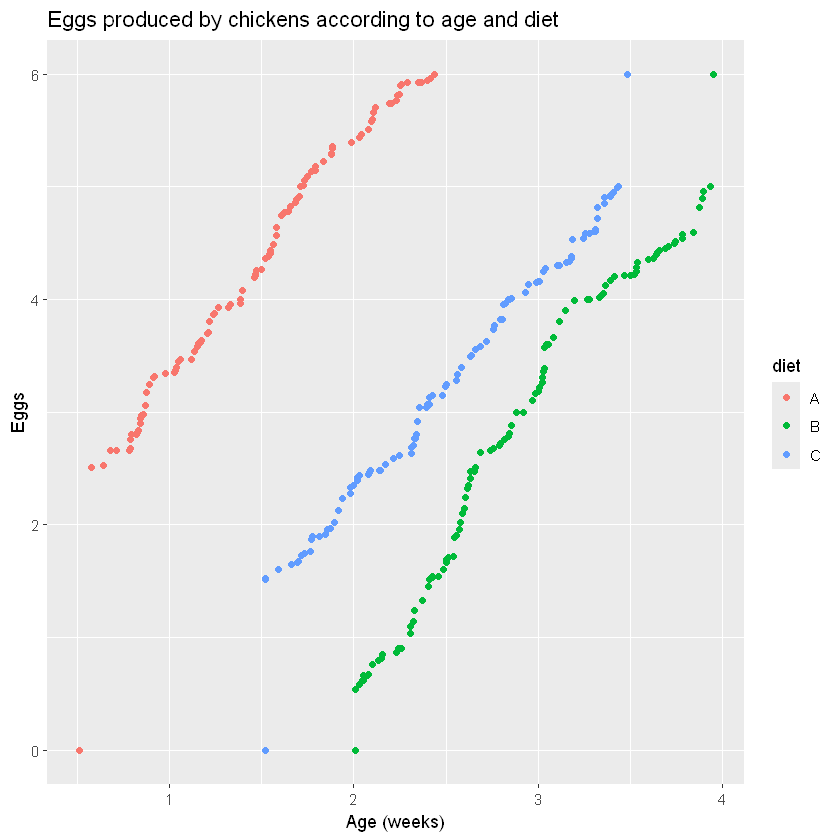

In [10]:
ggplot(data=chickens) +
  geom_point(aes(x=age, y=eggs, color=diet)) +
  ggtitle("Eggs produced by chickens according to age and diet") +
  xlab("Age (weeks)") + ylab("Eggs")

A boxplot of the ages of diet groups. While it's theoretically possible that there's a link between diet and eggs produced, it's inconclusive with this dataset.

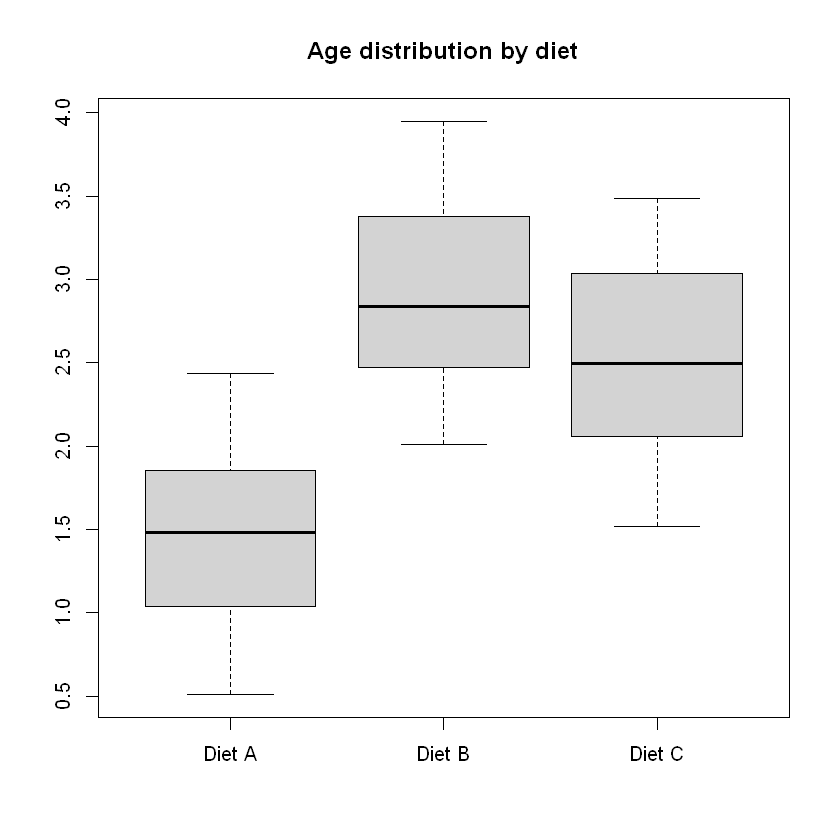

In [11]:
boxplot(chickens[chickens$diet == "A", "age"],
        chickens[chickens$diet == "B", "age"],
        chickens[chickens$diet == "C", "age"],
        names = c("Diet A", "Diet B", "Diet C"),
        main = "Age distribution by diet")